In [22]:
pip install pandas matplotlib seaborn folium

Note: you may need to restart the kernel to use updated packages.


### rainfall data viz ###

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Optional for larger visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [24]:
# load Data
df = pd.read_csv("overall_rainfall_data.csv")

# Convert 'day' column to datetime
df['day'] = pd.to_datetime(df['day'])


df.head() #just inspecting the basic structure

,day,station_id,station_name,latitude,longitude,total_rainfall
0,2022-01-01,S08,Upper Thomson Road,1.37010,103.82710,36.8
1,2022-01-01,S100,Woodlands Road,1.41720,103.74855,32.0
2,2022-01-01,S104,Woodlands Avenue 9,1.44387,103.78538,17.0
3,2022-01-01,S106,Pulau Ubin,1.41680,103.96730,6.8
4,2022-01-01,S107,East Coast Parkway,1.31350,103.96250,13.6


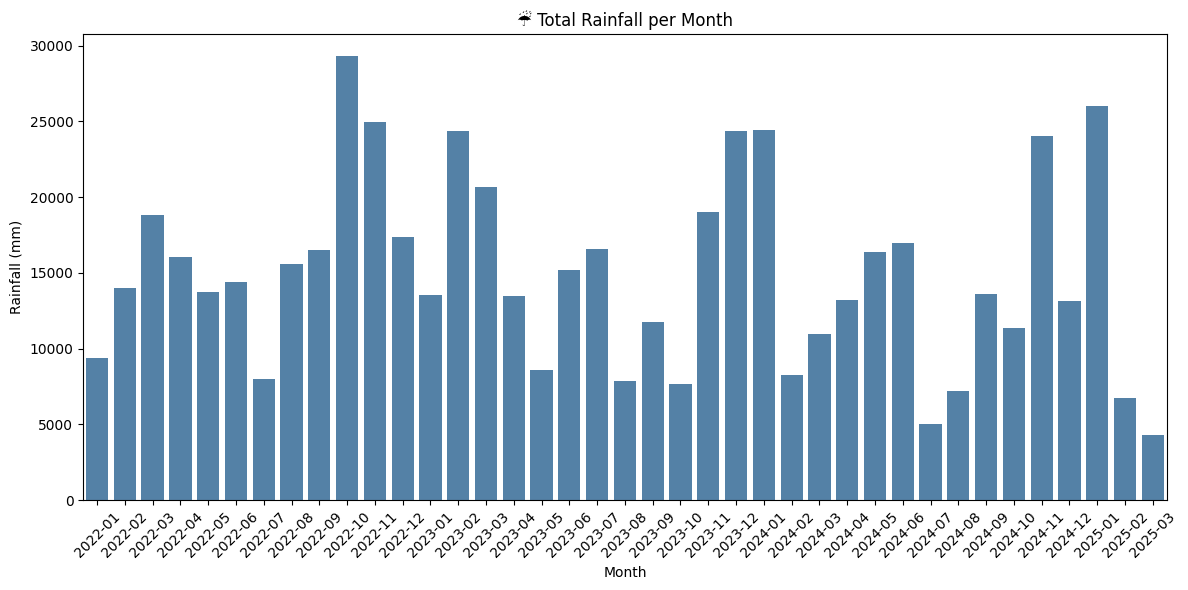

In [25]:
# bar chart for sanity check
df['month'] = df['day'].dt.to_period('M')
monthly_rainfall = df.groupby('month')['total_rainfall'].sum().reset_index()
monthly_rainfall['month'] = monthly_rainfall['month'].astype(str)

# plot
sns.barplot(data=monthly_rainfall, x='month', y='total_rainfall', color='steelblue')
plt.xticks(rotation=45)
plt.title('☔ Total Rainfall per Month')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()

In [26]:
# heatmap for avg rainfall per Station
avg_rainfall_by_station = df.groupby(['station_id', 'station_name', 'latitude', 'longitude'])['total_rainfall'].mean().reset_index()

# Base map centered on Singapore
map_sg = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

# Prepare heat data
heat_data = [
    [row['latitude'], row['longitude'], row['total_rainfall']]
    for _, row in avg_rainfall_by_station.iterrows()
]

# Add heatmap layer
HeatMap(heat_data, radius=12).add_to(map_sg)

# Save the map as HTML and show link to it
map_sg.save("singapore_rainfall_heatmap.html")
print("✅ Heatmap saved as 'singapore_rainfall_heatmap.html'. Open this file in a browser to view it.")

✅ Heatmap saved as 'singapore_rainfall_heatmap.html'. Open this file in a browser to view it.


### humidity data viz ###

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Optional for larger visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [28]:
# load Data
df = pd.read_csv("overall_humidity_data.csv")

# Convert 'day' column to datetime
df['day'] = pd.to_datetime(df['day'])


df.head() #just inspecting the basic structure

,day,station_id,station_name,latitude,longitude,aggregated_value
0,2022-01-01,S109,Ang Mo Kio Avenue 5,1.3764,103.8492,87.795480
1,2022-01-01,S50,Clementi Road,1.3337,103.7768,89.294715
2,2022-01-01,S107,East Coast Parkway,1.3135,103.9625,88.630523
3,2022-01-01,S43,Kim Chuan Road,1.3399,103.8878,86.613908
4,2022-01-01,S108,Marina Gardens Drive,1.2799,103.8703,97.547636


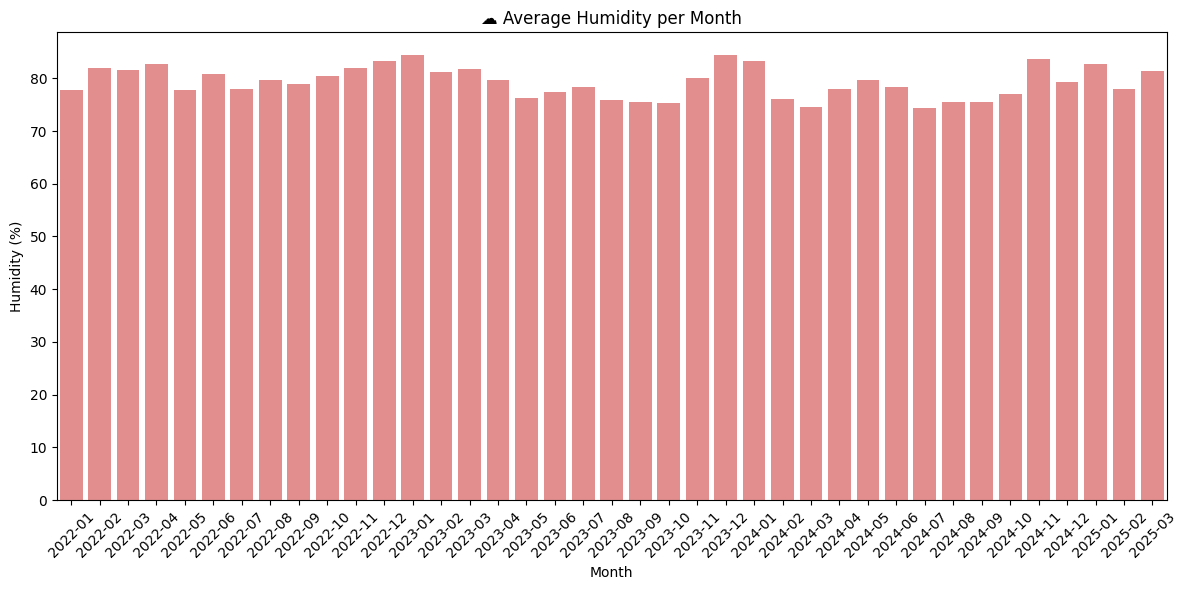

In [29]:
# bar chart for sanity check
df['month'] = df['day'].dt.to_period('M')
monthly_avg_humidity = df.groupby('month')['aggregated_value'].mean().reset_index()
monthly_avg_humidity['month'] = monthly_avg_humidity['month'].astype(str)

# plot
sns.barplot(data=monthly_avg_humidity, x='month', y='aggregated_value', color='lightcoral')
plt.xticks(rotation=45)
plt.title('☁️ Average Humidity per Month')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()

In [30]:
# heatmap of avg humidity per station
avg_humidity_by_station = df.groupby(['station_id', 'station_name', 'latitude', 'longitude'])['aggregated_value'].mean().reset_index()

# base map centered on Singapore
map_humidity = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

# prep heat data
heat_data = [
    [row['latitude'], row['longitude'], row['aggregated_value']]
    for _, row in avg_humidity_by_station.iterrows()
]

# add heatmap layer & save the map as HTML and show link to it
HeatMap(heat_data, radius=12).add_to(map_humidity)
map_humidity.save("singapore_humidity_heatmap.html")
print("✅ Humidity heatmap saved as 'singapore_humidity_heatmap.html'.")

✅ Humidity heatmap saved as 'singapore_humidity_heatmap.html'.
